# Bootstrapping Methods

## What we will accomplish in this notebook

We discuss the general idea of bootstrapping and present three different methods:
- Simulating using a fit model.
- Resampling rows from the whole table.
- An intermediate method where we resample the residuals of a fit model.

## What is Bootstrapping?

Bootstrapping is a statistical technique used to estimate the distribution of a sample statistic by **resampling with replacement** from the original dataset. This method allows you to assess the variability or uncertainty of a statistic, such as the mean, median, or standard deviation, without making strong assumptions about the underlying population distribution.

In broad outline bootstrapping works like this:

1.  Bootstrap Resampling: From your original data set of size $n$, you randomly draw a sample of size $n$ **with replacement**. This means that some data points from the original set may appear more than once in the resampled set, while others may not appear at all.

2. Repeat: This resampling process is repeated many times, typically thousands or tens of thousands of times, to create a large number of "bootstrap samples."

3. Calculate the Statistic: For each bootstrap sample, you calculate the statistic of interest (e.g., mean, median, correlation).

4. Build a Distribution: The collection of these calculated statistics forms the bootstrap distribution, which approximates the sampling distribution of the statistic.

We will mostly use the bootstrap distribution to build confidence intervals for the bootstrapped statistic. For example, the 2.5th and 97.5th percentiles of the bootstrap distribution might be used to form a 95% confidence interval.

WARNING:  The method we just described for building confidence intervals is called the **bootstrap percentile method**.  It should rarely be used!  There are more advanced methods which have much better coverage properties.  We will discuss these in the next notebook.  We are using the percentile method here because it is very easy to understand and implement.

The reason that bootstrapping works is, **very roughly**, that if our sample is representative of the population, then bootstrap resamples of the sample should be similar to resampling from the population.  So the distribution of a bootstrapped statistic should give us an idea of the sampling variability of that statistic.

Let's see this in action using the following dataset sourced from [kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data).

> This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Let's investigate the median home price.

In [12]:
import pandas as pd
import numpy as np 

df = pd.read_csv("../data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


We will use the [pandas dataframe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) `.sample` with `n` taken to be the number of rows and `replace = True` to resample *with* replacement.

We will generate 10000 bootstrap samples, calculate the median price of each sample, and store all of these medians. We will then plot a histogram of these bootstrapped medians to get an idea of the distribution of this statistic.

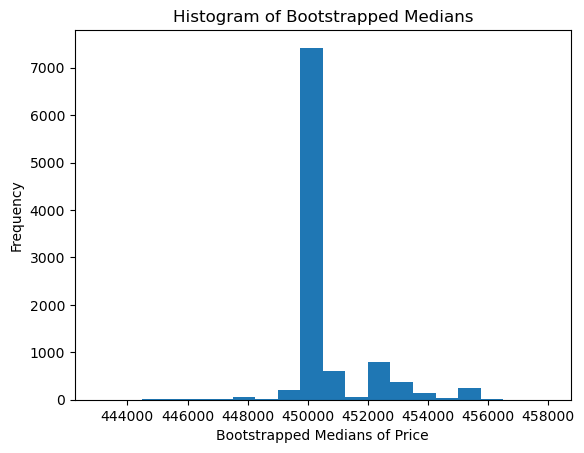

In [13]:
import matplotlib.pyplot as plt

nobs = df.shape[0]
num_resamples = 10000
bs_medians = []
for i in range(num_resamples): # 10000 bootstrap resamples
    bs_sample = df.sample(n = nobs, replace = True) # sampling from df with replacement.
    bs_median = bs_sample.price.median() # finding the median price of this resample
    bs_medians.append(bs_median) # appending this median price to our list.

plt.hist(bs_medians, bins = 20)
plt.xlabel('Bootstrapped Medians of Price')  
plt.ylabel('Frequency')                      
plt.title('Histogram of Bootstrapped Medians') 
plt.show()

Notice that a normality assumption would not be valid here!

We can find the $2.5\%$, %50\%$ and $97.5\%$ quantiles as follows:

In [14]:
quantiles = np.quantile(bs_medians, [0.025, 0.5, 0.975])

print("2.5th percentile:", quantiles[0])
print("50th percentile (Median):", quantiles[1])
print("97.5th percentile:", quantiles[2])

2.5th percentile: 449500.0
50th percentile (Median): 450000.0
97.5th percentile: 455000.0


In this case the median of the bootstrap medians coincided with the sample median (i.e. the median of `bs_medians` was equal to the median of `df.price`).  This is not always the case, although they should be close.  This kind of consideration is why the percentile method is not always the best.  However, in this instance it seems okay!

We can now report $[449500,454950]$ as a $95\%$ confidence interval for the bootstrap median.

Now that we have discussed the general idea of bootstrapping, we turn our attention to three different methods in the context of modeling:
- A model based bootstrap where we simulate from a fit model.
- A model agnostic bootstrap which resamples rows from the whole table.
- An intermediate method where we resample the residuals of a fit model.

## Simulating from a model

If we trust our model quite a lot, then we can get an idea of the variability in statistics by simulating from our fit model.

Let's do this for a simple linear regression model where we regress price on square feet of living space:

$$
\textrm{Price} = \beta_0 + \beta_1 (\textrm{Living Space}) + \epsilon
$$

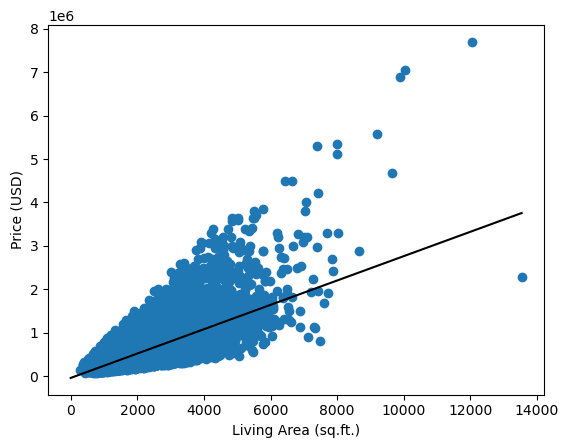

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df.sqft_living.values.reshape(-1,1), df.price)

plt.scatter(df.sqft_living, df.price)

xs_for_plotting = np.linspace(0, df.sqft_living.max())
plt.plot(xs_for_plotting, model.predict(xs_for_plotting.reshape(-1,1)), '-k')

plt.xlabel('Living Area (sq.ft.)')  
plt.ylabel('Price (USD)')                      
plt.show()

In [16]:
model.coef_[0]

280.6235678974508

According to our model, each additional square foot changes the expected value of a home by $\$280$.  What if we want a confidence interval on that statistic?  In this case we have an analytic formula which we could apply.  Instead, we will use bootstrapping to illustrate the method.

Just by looking at the graph we can tell that the SLR model assumptions do not hold valid since we have heteroskedasticity.

Despite this we will *pretend* that the model assumptions do hold and obtain a confidence interval for the slope by simulating from the fit model.

Remember that the unbiased estimate for variance of the error term is $\frac{1}{n-2}$ (because we estimated $2$ model parameters) times the residual sum of squares:

$$
\hat{\sigma}^2 = \frac{1}{n-2} \sum_i^n (y_i - \hat{y}_i)^2
$$

In [17]:
predictions = model.predict(df.sqft_living.values.reshape(-1,1))
sigma_hat = (1/(nobs - 2)) * ((df.price - predictions)**2).sum()

We will now simulate from our model and record the slope of the model when we fit to this simulated data:

In [18]:
slopes = []
simulated_model = LinearRegression()

for i in range(10000):
    simulated_prices = predictions + np.random.normal(loc = 0, scale = sigma_hat**0.5, size = nobs)
    simulated_model.fit(df.sqft_living.values.reshape(-1,1), simulated_prices)
    slopes.append(simulated_model.coef_[0])

In [19]:
quantiles = np.quantile(slopes, [0.025, 0.5, 0.975])

print("2.5th percentile:", quantiles[0])
print("50th percentile (Median):", quantiles[1])
print("97.5th percentile:", quantiles[2])

2.5th percentile: 276.79612588097353
50th percentile (Median): 280.6286122560924
97.5th percentile: 284.4298367502063


So we have obtained $[276.8, 284.4]$ as our $95\%$ confidence interval.  Let's compare that to the confidence interval we would obtain analytically:

In [20]:
# Refitting model using statsmodels which includes confidence intervals
import statsmodels.api as sm

# Add a constant (intercept) to the model.  This is the column of ones in the design matrix
X = sm.add_constant(df.sqft_living)

# Fit the OLS model.  Remember that statsmodels has (y,X) instead of (X,y).
model = sm.OLS(df.price, X).fit()

slope_confidence_interval = model.conf_int().loc['sqft_living']
print("Confidence interval for the slope (sqft_living):")
print(slope_confidence_interval[0], slope_confidence_interval[1])

Confidence interval for the slope (sqft_living):
276.828083902797 284.4190518920995


We can see that the model based bootstrap gives us confidence intervals which agreed extremely well with the analytical formula.

## Resampling bootstrap

Instead of simulating from our fit model we can instead resample observations.

In [21]:
slopes = []
resampled_model = LinearRegression()

for i in range(10000):
    resampled_df = df.sample(n=nobs, replace=True)
    resampled_model.fit(resampled_df.sqft_living.values.reshape(-1,1), resampled_df.price)
    slopes.append(resampled_model.coef_[0])

quantiles = np.quantile(slopes, [0.025, 0.5, 0.975])

print("2.5th percentile:", quantiles[0])
print("97.5th percentile:", quantiles[2])

2.5th percentile: 269.9495094051145
97.5th percentile: 291.8045502799592


Note that resampling the observations is giving us a wider confidence interval.  That makes sense!  Compared to the simulation based method we are assuming a lot less about the distribution of our data, and the confidence interval is wider as a result.

In this case I would trust this model agnostic bootstrap more, as we already discussed that the assumption of the error terms having equal variance is not applicable here.  Even then we are estimating with OLS which assumes equal variance, so we might prefer weighted least squares if we were doing this "for real".

## Resampling residuals

An intermediate method is to resample from the model residuals.  This assumes that the errors are identically distributed (which does not hold here), but doesn't assume that they are normally distributed. 

In [22]:
slopes = []

model = LinearRegression()
model.fit(df.sqft_living.values.reshape(-1,1), df.price)

predictions = model.predict(df.sqft_living.values.reshape(-1,1))
residuals = df.price - predictions

resampled_model = LinearRegression()

for i in range(10000):
    resampled_residuals = np.random.choice(residuals, nobs) # using numpy sampling function since residuals is an array
    resampled_model.fit(df.sqft_living.values.reshape(-1,1), predictions + resampled_residuals)
    slopes.append(resampled_model.coef_[0])

quantiles = np.quantile(slopes, [0.025, 0.5, 0.975])

print("2.5th percentile:", quantiles[0])
print("97.5th percentile:", quantiles[2])

2.5th percentile: 276.8086792586638
97.5th percentile: 284.41855734549415


This ended up being pretty similar to the model based bootstrap in this case.